In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
ds = pd.read_csv("../input/the-economists-big-mac-index/output-data/big-mac-full-index.csv")
dates = ds.date.unique()

In [3]:
path = gpd.datasets.get_path('naturalearth_lowres')
df = gpd.read_file(path)
df["BMI"]=df.iso_a3.copy()

In [4]:
def prep_table(inp):
    dds = ds[ds.date==inp][["iso_a3","USD_raw"]]
    chg={}
    for i in df.iso_a3:
        for j in dds.iso_a3:
            if i==j:
                chg.update( {i : dds[dds.iso_a3==j].USD_raw.values[0]})
    for i in df[~df.iso_a3.isin(dds.iso_a3)].iso_a3.values:
        chg.update( {i : np.nan})
    df["BMI"] = df["BMI"].replace(chg)
    return df

Text(0.5, 1.0, 'BigMacIndex from 2000-04-01')

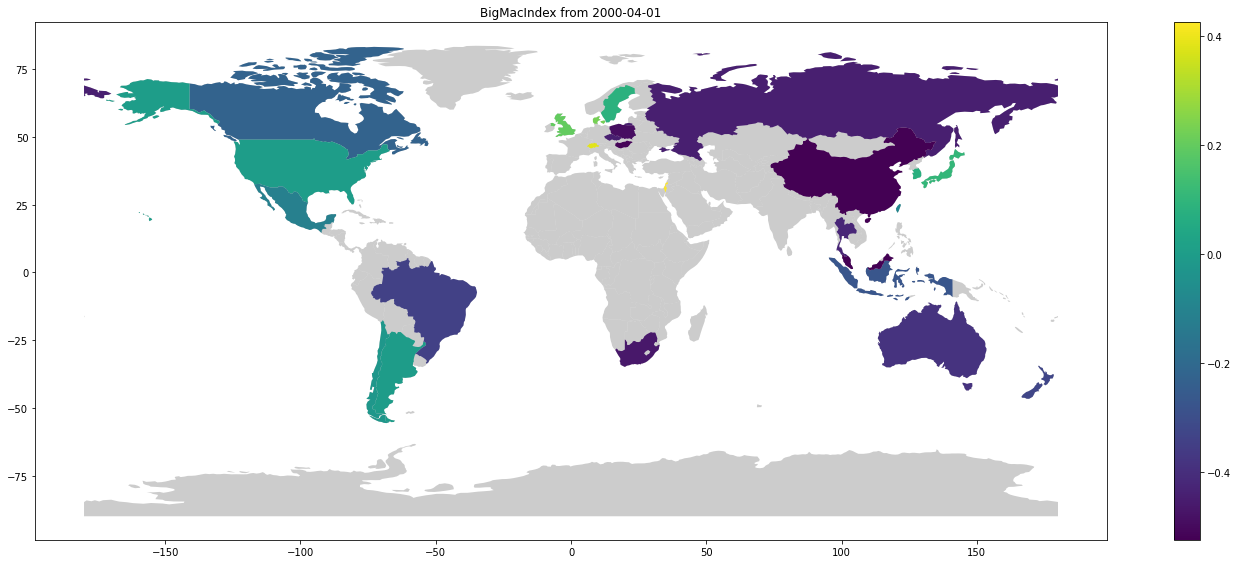

In [5]:
date_=dates[0]
fig, ax = plt.subplots(figsize=(24,18))
df.plot(ax=ax, alpha=0.4, color='grey')
prep_table(date_).plot(column='BMI', ax=ax, legend=True, legend_kwds={'shrink': 0.53})
plt.title('BigMacIndex from '+date_)

In [6]:
def f(xx):
    date_=xx
    fig, ax = plt.subplots(figsize=(24,18))
    df.plot(ax=ax, alpha=0.4, color='grey')
    prep_table(date_).plot(column='BMI', ax=ax, legend=True, legend_kwds={'shrink': 0.53})
    plt.title('BigMacIndex from '+date_)
    return xx
interact(f, xx=dates);

interactive(children=(Dropdown(description='xx', options=('2000-04-01', '2001-04-01', '2002-04-01', '2003-04-0…